<a href="https://colab.research.google.com/github/giumanuz/DFSan_pde/blob/main/Homework_Giulio_Manuzzi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### For the homeworks we are going to use the "[Online News Popularity Data Set](https://archive.ics.uci.edu/ml/datasets/Online+News+Popularity#)"

The dataset can be used both for regression and classification tasks.

#### Source:

Kelwin Fernandes INESC TEC, Porto, Portugal/Universidade do Porto, Portugal.
Pedro Vinagre ALGORITMI Research Centre, Universidade do Minho, Portugal
Paulo Cortez ALGORITMI Research Centre, Universidade do Minho, Portugal
Pedro Sernadela Universidade de Aveiro

#### Data Set Information:

* The articles were published by Mashable (www.mashable.com) and their content as the rights to reproduce it belongs to them. Hence, this dataset does not share the original content but some statistics associated with it. The original content be publicly accessed and retrieved using the provided urls.
* Acquisition date: January 8, 2015
* The estimated relative performance values were estimated by the authors using a Random Forest classifier and a rolling windows as assessment method. See their article for more details on how the relative performance values were set.

Attribute Information:

Number of Attributes: 61 (58 predictive attributes, 2 non-predictive, 1 goal field)

Attribute Information:
0. url: URL of the article (non-predictive)
1. timedelta: Days between the article publication and the dataset acquisition (non-predictive)
2. n_tokens_title: Number of words in the title
3. n_tokens_content: Number of words in the content
4. n_unique_tokens: Rate of unique words in the content
5. n_non_stop_words: Rate of non-stop words in the content
6. n_non_stop_unique_tokens: Rate of unique non-stop words in the content
7. num_hrefs: Number of links
8. num_self_hrefs: Number of links to other articles published by Mashable
9. num_imgs: Number of images
10. num_videos: Number of videos
11. average_token_length: Average length of the words in the content
12. num_keywords: Number of keywords in the metadata
13. data_channel_is_lifestyle: Is data channel 'Lifestyle'?
14. data_channel_is_entertainment: Is data channel 'Entertainment'?
15. data_channel_is_bus: Is data channel 'Business'?
16. data_channel_is_socmed: Is data channel 'Social Media'?
17. data_channel_is_tech: Is data channel 'Tech'?
18. data_channel_is_world: Is data channel 'World'?
19. kw_min_min: Worst keyword (min. shares)
20. kw_max_min: Worst keyword (max. shares)
21. kw_avg_min: Worst keyword (avg. shares)
22. kw_min_max: Best keyword (min. shares)
23. kw_max_max: Best keyword (max. shares)
24. kw_avg_max: Best keyword (avg. shares)
25. kw_min_avg: Avg. keyword (min. shares)
26. kw_max_avg: Avg. keyword (max. shares)
27. kw_avg_avg: Avg. keyword (avg. shares)
28. self_reference_min_shares: Min. shares of referenced articles in Mashable
29. self_reference_max_shares: Max. shares of referenced articles in Mashable
30. self_reference_avg_sharess: Avg. shares of referenced articles in Mashable
31. weekday_is_monday: Was the article published on a Monday?
32. weekday_is_tuesday: Was the article published on a Tuesday?
33. weekday_is_wednesday: Was the article published on a Wednesday?
34. weekday_is_thursday: Was the article published on a Thursday?
35. weekday_is_friday: Was the article published on a Friday?
36. weekday_is_saturday: Was the article published on a Saturday?
37. weekday_is_sunday: Was the article published on a Sunday?
38. is_weekend: Was the article published on the weekend?
39. LDA_00: Closeness to LDA topic 0
40. LDA_01: Closeness to LDA topic 1
41. LDA_02: Closeness to LDA topic 2
42. LDA_03: Closeness to LDA topic 3
43. LDA_04: Closeness to LDA topic 4
44. global_subjectivity: Text subjectivity
45. global_sentiment_polarity: Text sentiment polarity
46. global_rate_positive_words: Rate of positive words in the content
47. global_rate_negative_words: Rate of negative words in the content
48. rate_positive_words: Rate of positive words among non-neutral tokens
49. rate_negative_words: Rate of negative words among non-neutral tokens
50. avg_positive_polarity: Avg. polarity of positive words
51. min_positive_polarity: Min. polarity of positive words
52. max_positive_polarity: Max. polarity of positive words
53. avg_negative_polarity: Avg. polarity of negative words
54. min_negative_polarity: Min. polarity of negative words
55. max_negative_polarity: Max. polarity of negative words
56. title_subjectivity: Title subjectivity
57. title_sentiment_polarity: Title polarity
58. abs_title_subjectivity: Absolute subjectivity level
59. abs_title_sentiment_polarity: Absolute polarity level
60. shares: Number of shares (target)


The first two columns (url and time_delta) are non-predictive and should be ignored

The last column **shares** contains the value to predict.

### Regression
In the case of regression we want to predict the value of the share column.

### Classification
In the case of classification we want to predict one of two classes:

* *low* -- shares < 1,400
* *high* -- shares >= 1,400

### Metrics

#### Regression
To evaluate how good we are doing on the **regression** task we will use the Root Mean Squared Error (RMSE). RMSE is given by

$$
\sqrt{\frac{1}{n}\sum\limits_{i=1}^{n}{\Big(d_i -f_i\Big)^2}}
$$


where:

* $n$ is the number of test samples
* $d_i$ is the ground truth value of the i-th sample
* $f_i$ is the predicted value of the i-th sample


#### Classification
To evaluate how good we are doing on the **classification** task we will use the accuracy metrics. Accuracy is given by

$$
\frac{TP+TN}{TP+TN+FP+FN}
$$

where:

* TP is the number of *correctly* classified positive samples
* TN is the number of *correctly* classified negative samples
* FP is the number of *incorrectly* classified positive samples
* FN is the number of *incorrectly* classified negative samples

In [ ]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00332/OnlineNewsPopularity.zip

--2023-04-08 12:19:43--  https://archive.ics.uci.edu/ml/machine-learning-databases/00332/OnlineNewsPopularity.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7476401 (7.1M) [application/x-httpd-php]
Saving to: ‘OnlineNewsPopularity.zip’

OnlineNewsPopularit 100%[===================>]   7.13M  5.13MB/s    in 1.4s    

2023-04-08 12:19:45 (5.13 MB/s) - ‘OnlineNewsPopularity.zip’ saved [7476401/7476401]



In [ ]:
!unzip OnlineNewsPopularity.zip

Archive:  OnlineNewsPopularity.zip
   creating: OnlineNewsPopularity/
  inflating: OnlineNewsPopularity/OnlineNewsPopularity.names  
  inflating: OnlineNewsPopularity/OnlineNewsPopularity.csv  


In [ ]:
import pandas as pd
import numpy as np

Format properly the names of the columns and remove the first two columns

In [ ]:
df = pd.read_csv('OnlineNewsPopularity/OnlineNewsPopularity.csv')
df = df.rename(columns=lambda x: x.strip())
df = df.iloc[: , 2:]

In [ ]:
df.dtypes

n_tokens_title                   float64
n_tokens_content                 float64
n_unique_tokens                  float64
n_non_stop_words                 float64
n_non_stop_unique_tokens         float64
num_hrefs                        float64
num_self_hrefs                   float64
num_imgs                         float64
num_videos                       float64
average_token_length             float64
num_keywords                     float64
data_channel_is_lifestyle        float64
data_channel_is_entertainment    float64
data_channel_is_bus              float64
data_channel_is_socmed           float64
data_channel_is_tech             float64
data_channel_is_world            float64
kw_min_min                       float64
kw_max_min                       float64
kw_avg_min                       float64
kw_min_max                       float64
kw_max_max                       float64
kw_avg_max                       float64
kw_min_avg                       float64
kw_max_avg      

## Let's plot some of the columns

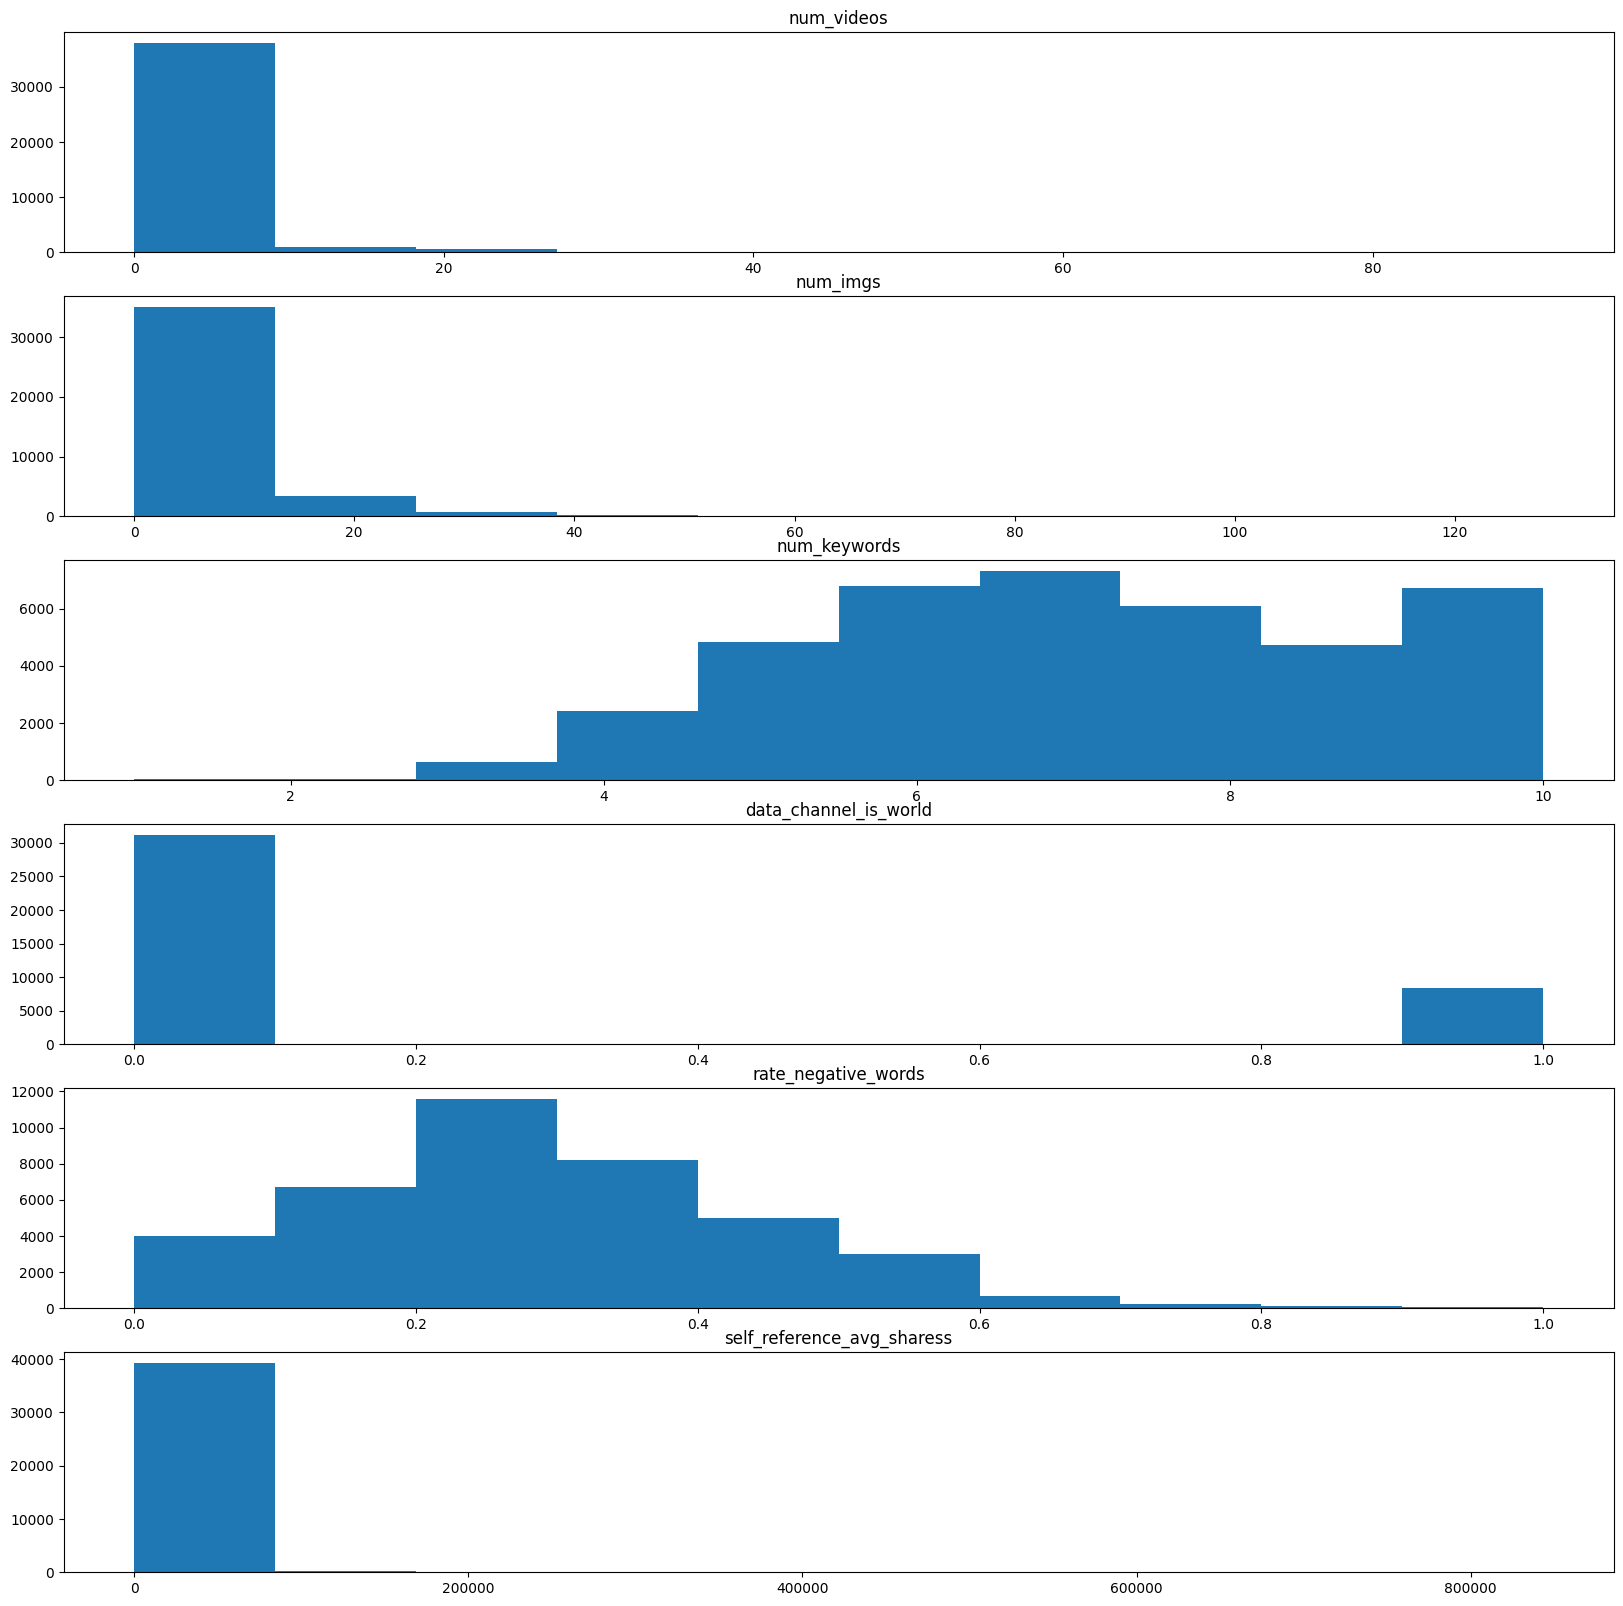

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

columns_to_plot = [
    'num_videos',
    'num_imgs',
    'num_keywords',
    'data_channel_is_world',
    'rate_negative_words',
    'self_reference_avg_sharess',
]

fig, ax = plt.subplots(len(columns_to_plot), 1, figsize=(20, 20))

for i, column in enumerate(columns_to_plot, 0):
  ax[i].hist(df[column])
  ax[i].title.set_text(column)

plt.show()

##Preparazione dei dati

In [ ]:
from sklearn.model_selection import train_test_split

matrix=np.array(df)
x=matrix[: , :-1]
y=np.array([elem >= 1400 for elem in matrix[:, -1]])

x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.2, random_state=1)


#Decision Tree

Un Decision Tree è un algoritmo di **apprendimento supervisionato** utilizzato nell'ambito del machine learning.

Il decision tree rappresenta un **modello predittivo** che, a partire da un insieme di dati di training, costruisce un albero di decisione rappresentato da una serie di *decisioni* per giungere a una predizione.

I valori di input e output possono essere discreti o continui, ma nella mia implementazione considerero' solo valori discreti in input e valori booleani in output (YES in caso di esito positivo, NO in caso di esito negativo).

##Costruzione del DT

Il processo di costruzione del decision tree prevede la selezione della feature più importante per separare i dati in sottoinsiemi omogenei, in modo da ridurre l'entropia all'interno di ogni sottoinsieme. 
Sia $B(q)$ l'entropia di una variabile aleatoria booleana che eè vera con probabilita' $q$:

$$
B(q)=-(q \cdot log_2q + (1-q)log_2(1-q))
$$

Se un training set contiene $p$ examples positivi ed $n$ examples negativi, allora l'entropia della variabile in output nell'intero set è :

$$
H(Output)=B(\frac{p}{p+n})
$$

Un attributo A con *d* distinti valori divide il training set E in $E_1$, $E_2$, ... , $E_d$ sottoinsiemi.
Ciascun sottoinsieme $E_k$ ha $p_k$ esempi positivi e $n_k$ esempi negativi. Un esempio scelto a caso dal training set ha il valore k-esimo per l'attributo (ovvero, è in E$_k$ con probabilità $\frac{p_k + n_k}{p + n}$), quindi l'entropia attesa rimanente dopo il test dell'attributo A è:

$$
Remainder(A) = \sum\limits_{k=1}^{d}{\frac{p_k + n_k}{p + n}B(\frac{p_k}{p_k+n_k})}
$$


Per cercare, quindi, il miglior attributo A su cui splittare il dataset, bisogna trovare la feature con il **Gain maggiore**:

$$
Gain(A)=\frac{p}{p+n} - Remainder(A)
$$

L'algoritmo da noi studiato, come in genere quelli basati su alberi, e' di tipo ricorsivo.
Ci sono solamente 4 casi base:

* Se i restanti examples sono tutti positivi (o tutti negativi), allora abbiamo finito: possiamo rispondere Sì o No.
* Se non sono rimasti examples, significa che non è stato osservato alcun example per questa combinazione di valori di attributo e restituiamo il valore di output più comune dall'insieme di esempi utilizzati nella costruzione del genitore del nodo (*majority value*). 
* Se non sono rimasti attributi, ma examples sia positivi che negativi, significa che questi esempi hanno esattamente la stessa descrizione, ma classificazioni diverse.
Questo può accadere perché: c'è un errore o un **rumore** nei dati; perché il dominio è non-deterministico; perché non possiamo osservare un attributo che distinguerebbe gli examples.
* Se ci sono alcuni esempi positivi e alcuni negativi, si sceglie l'attributo migliore per dividerli (passo ricorsivo). Sulla base di questo attributo si splittano gli examples rimasti in due insiemi secondo il metodo della meduiana: gli examples con il corrispondente valore della feature minore del valore della mediana costituiranno gli examples che serviranno da input alla funzione ricorsiva sul figlio sinistro: viceversa, quelli con valore maggiore o uguale costituiranno l'input al passo ricorsivo sul figlio destro.


Una volta costruito il decision tree, esso può essere utilizzato per effettuare predizioni su nuovi dati di test, seguendo il percorso dell'albero a partire dalla radice fino ad arrivare ad una foglia che rappresenta la predizione finale.

In sintesi, l'albero decisionale rappresenta un modello intuitivo e interpretabile che permette di effettuare predizioni basate su regole semplici. Tuttavia, è importante considerare che la scelta delle feature e l'ordine di presentazione possono influire notevolmente sulla qualità delle predizioni e sulla robustezza del modello.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.tree import export_graphviz
import numpy as np
from statistics import median
import cProfile
import math
import time


class Node:

    def __init__(self, feature, median, left, right, value=None):
        self.feature = feature
        self.median = median
        self.left = left
        self.right = right
        self.value = value
    
    def isLeaf(self):
        return self.value!=None
    
    def getFeature(self):
        return self.feature
    
    def getMedian(self):
        return self.median
    
    def getLeft(self):
        return self.left
    
    def getRight(self):
        return self.right
    
    def getValue(self):
        return self.value
    
class Tree:

    def __init__(self):
        self.root=None 

    def entropy(self, p):
        if p==0 or p==1:
            return 0
        return -p*math.log2(p) - (1-p)*math.log2((1-p))

    def calcolaSXDX(self, feature, examples):
        leftPositives = 0
        rightPositives = 0
        leftElementsCount = 0
        rightElementsCount = 0
        mediana = median([elem[feature] for elem in examples])
        
        for i in range(len(examples)):
            if examples[i][feature] <= mediana:
                leftElementsCount += 1
                if examples[i][-1] == True:
                    leftPositives += 1
            else:
                rightElementsCount += 1
                if examples[i][-1] == True:
                    rightPositives += 1
        return leftPositives, rightPositives, leftElementsCount, rightElementsCount

    def remainder(self, feature, examples):
        leftPositives, rightPositives , leftElementsCount, rightElementsCount = self.calcolaSXDX(feature, examples)

        if (leftElementsCount==0 and rightElementsCount==0 or leftPositives ==0 and rightPositives ==0):
            return 0
        elif (leftElementsCount==0 or leftPositives ==0):
            return (rightElementsCount/(leftElementsCount+rightElementsCount))*self.entropy(rightPositives/rightElementsCount)
        elif (rightElementsCount==0) or rightPositives ==0:
            return (leftElementsCount/(leftElementsCount+rightElementsCount))*self.entropy(leftPositives/leftElementsCount)

        return (leftElementsCount/(leftElementsCount+rightElementsCount))*self.entropy(leftPositives/leftElementsCount) + (rightElementsCount/(leftElementsCount+rightElementsCount))*self.entropy(rightPositives/rightElementsCount)

    def splitFeature(self, feature, examples):
        mediana= median([elem[feature] for elem in examples])
    
        sxList=[]
        dxList=[]
        for i in range(len(examples)):
            if examples[i][feature] <= mediana:
                sxList.append(examples[i])
            else:
                dxList.append(examples[i])
        return mediana, sxList, dxList

    def gain(self, entropy, feature, examples):
        return entropy - self.remainder(feature, examples)

    def pluralityValue(self, examples):
        numPos = 0
        for i in range(len(examples)):
            if examples[i][-1] == True:
                numPos += 1
        if numPos > len(examples)/2:
            return Node(None, None, None, None, True)
        else:
            return Node(None, None, None, None, False)
        
    def allSameClass(self, examples):
        for i in range(len(examples)-1):
            if examples[i][-1] != examples[i+1][-1]:
                return False
        return True

    def fit(self, examples):
        features=[i for i in range(len(examples[0])-1)]
        self.root=self.learnDecisionTree(examples, features, examples)


    def learnDecisionTree(self, examples, attributes, parent_examples):

        if len(examples) == 0:
            return self.pluralityValue(parent_examples)
        elif self.allSameClass(examples):
            return Node(None, None, None, None, examples[0][-1])
        elif len(attributes) == 0:
            return self.pluralityValue(examples)
        else:
            bestFeature = self.getBestFeature(examples, attributes)

            mediana, sx, dx=self.splitFeature(bestFeature, examples)

            leftAttributes=attributes.copy()
            leftAttributes.remove(bestFeature)
            nodoSx=self.learnDecisionTree(sx, leftAttributes, examples)

            rightAttributes=attributes.copy()
            rightAttributes.remove(bestFeature)
            nodoDx=self.learnDecisionTree(dx, rightAttributes, examples)

            nodo = Node(bestFeature, mediana, nodoSx, nodoDx)
            return nodo

    def getBestFeature(self, examples, attributes):
        positiveCount=0
        for i in range(len(examples)):
            if examples[i][-1]==True:
                positiveCount+=1
        entropy=self.entropy(positiveCount/len(examples))
        maxGain=None
        bestFeature=0
        for feature in attributes:
            gainFeature=self.gain(entropy, feature, examples)
            if maxGain==None or gainFeature>maxGain :
                maxGain=gainFeature
                bestFeature=feature
        return bestFeature

    def predict(self, x, nodo=None):
        if self.root == None:
            raise Exception("Il modello non è stato ancora addestrato")
        else:
            if nodo==None:
                nodo=self.root
            if nodo.isLeaf():
                return nodo.getValue()
            else:
                if x[nodo.getFeature()] <= nodo.getMedian():
                    return self.predict(x, nodo.getLeft())
                else:
                    return self.predict(x, nodo.getRight())
            
    def accuracy(self, x_test, y_test):
        count=0
        for i in range(len(x_test)):
            if self.predict(x_test[i])==y_test[i]:
                count+=1
        return count/len(x_test)


## Training e Test

###Mia implementazione

In [ ]:
attributes=[i for i in range(len(x_train[0]))]
x_train=x_train.tolist()
for i in range(len(x_train)):
    x_train[i].append(y_train[i])

mioTree= Tree()
start=time.time()
mioTree.fit(x_train)
end=time.time()

print('Mia implementazione Decision Tree')
print(f'Tempo di addestramento= {end-start} secondi')
print(f'Accuracy = {mioTree.accuracy(x_test,  y_test )*100}%')

###Scikit-Learn library

In [ ]:
matrix=np.array(df)
x=matrix[: , :-1]
y=np.array([elem >= 1400 for elem in matrix[:, -1]])

x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.2, random_state=1)

clf=tree.DecisionTreeClassifier( criterion='entropy')
clf=clf.fit(x_train, y_train)

print('Scikit-learn Decision Tree')
print(f'Accuracy = {metrics.accuracy_score(y_test, clf.predict(x_test))*100}%')

#Linear Regression and Classification

La regressione e classificazione lineare sono due tecniche machine learning utilizzate per effettuare predizioni su dati numerici.

La regressione lineare è un processo di determinazione di una funzione lineare che approssima al meglio la relazione tra una variabile dipendente $Y$ ed una o piu' variabili indipendenti $X_1, X_2, ... , X_k$. 

La classificazione lineare, invece, ha come obiettivo quello di utilizzare le caratteristiche di un oggetto per identificare a quale classe (o gruppo) appartiene.

In entrambi i casi, la "lineare" nella regressione e classificazione lineare si riferisce alla funzione matematica utilizzata per modellare la relazione tra le variabili di input e output.


Una funzione lineare con input x e output y ha la forma:
$$
y = h(x) = w_1 x +  w_0
$$
dove $w_1$ e $w_0$ sono dei coefficienti che devono essere imparati dal modello. Possiamo quindi esprimere il modello come il prodotto scalare tra il vettore dei pesi $w = [w_0, w_1]^T$ e il vettore delle features di un sample $x = [1, x]^T$.

Il nostro obiettivo e' trovare i coefficienti $w_1$ e $w_0$ ottimi tali che la funzione di loss sia minima. 

$$
Loss(h_w) = \sum\limits_{j=1}^{N}(y_i-(w_1x_j+w_0))^2
$$

Quindi si impongono le derivate parziali rispetto ai coefficienti uguali a zero:

$$
\begin{cases}
\frac{\partial}{\partial w_0} \sum\limits_{j=1}^{N}(y_i-(w_1x_j+w_0))^2 &= 0 \\
\frac{\partial}{\partial w_1} \sum\limits_{j=1}^{N}(y_i-(w_1x_j+w_0))^2 &= 0 \\
\end{cases}
$$
Dove l'unica soluzione e':

$$
\begin{cases}
w_1 = \frac {N( \sum x_j y_j) - ( \sum x_j)( \sum y_j)}{N( \sum x_j^2) - ( \sum x_j)^2} \\
w_0 = \frac {\sum y_j - w_1 \sum x_j}{N}
\end{cases}
$$

Il codice seguente implementa la regressione lineare senza regolarizzazione in cui uso la formula chiusa per il vettore dei pesi (Equazione normale):

$$
w^* = (X^TX)^{-1}X^Ty
$$

##Preparazione dei dati

In [ ]:
x=matrix[: , :-1]
x=(x-x.mean(axis=0))/x.std(axis=0)
y=matrix[: , -1]

x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.2, random_state=1)

##Regressione Lineare senza regolarizzaione

###Mia implementazione (con formula chiusa)

In [ ]:
from sklearn.metrics import mean_squared_error

class LinearRegression:
    def __init__(self):
        self.w = None
        self.b = None

    def fit(self, x, y):
        x = np.insert(x, 0, 1, axis=1)
        self.w = np.linalg.inv(x.T.dot(x)).dot(x.T).dot(y)
        self.b = self.w[0]
        self.w = self.w[1:]

    def predict(self, x):
        return x.dot(self.w) + self.b

In [ ]:
myModel=LinearRegression()
myModel.fit(x_train, y_train)

print('Mia implemntazione: Linear Regression senza regolarizzazione con formula chiusa')
print(f'accuracy_test= {mean_squared_error(y_test, myModel.predict(x_test), squared=False)}')



Mia implemntazione: Linear Regression senza regolarizzazione con formula chiusa
accuracy_test= 8268.382811051537


###Scikit-Learn

In [ ]:
from sklearn.linear_model import LinearRegression as LR

modelloCVero=LR()
modelloCVero.fit(x_train, y_train)

print('Scikit-Learn: Linear regression senza regolarizzazione')
print(f'accuracy_test= {mean_squared_error(y_test, modelloCVero.predict(x_test), squared=False)}')

Scikit-Learn: Linear regression senza regolarizzazione
accuracy_test= 8263.745130527139


### Implementazione con Gradient Descent

Il Gradient Descent e' un algoruitmo di ottimizzazione volto a trovare i coefficienti ottimali del modello che minimizzano la funzione di costo del modello. E' un algoritmo che funziona iterativamente aggiornando i coefficienti in base alla direzione e al valore del gradiente della funzione di costo rispetto ai coefficienti stessi. Il Learning Rate e' un iperparametro dell'algoritmo che determina quanto grande sia il passo di aggiornamento dei coefficienti ad ogni iterazione. 

$$
\begin{cases}
w_0 \leftarrow w_0 + \alpha (y - h_w(x)) \\
w_1 \leftarrow w_1 + \alpha (y - h_w(x)) \times x
\end{cases}
$$

In [ ]:
class LinearRegression:
    def __init__(self, num_iter=1000, learning_rate=0.01, regolarizzation=None, regulation_parameters_L1=0.01, regulation_parameters_L2=0.01, classification=False):
        self.weights = None
        self.bias = None
        self.num_iter = num_iter
        self.learning_rate = learning_rate
        self.regolarizzation = regolarizzation
        self.regulation_parameters_L1 = regulation_parameters_L1
        self.regulation_parameters_L2 = regulation_parameters_L2
        self.classification = classification

    def fit(self, X, y):
        n_samples, n_features = X.shape
        X = np.insert(X, 0, 1, axis=1)
        self.weights = np.zeros(n_features+1)

        for i in range(self.num_iter):

            if self.classification:
                if self.regolarizzation == 'logistic':
                    y_predicted = [1 / (1 + math.exp(-i)) for i in np.dot(X, self.weights)]
                else:
                    y_predicted = [1 if i >=0 else 0 for i in np.dot(X, self.weights)]
            else:
                y_predicted = np.dot(X, self.weights)

            
            if self.regolarizzation == 'L1':
                dw=(1/n_samples)*np.dot(X.T, (y_predicted-y)) + self.regulation_parameters_L1*np.sign(self.weights)
            elif self.regolarizzation == 'L2':
                dw=(1/n_samples)*np.dot(X.T, (y_predicted-y)) + 2* self.regulation_parameters_L2*self.weights
            elif self.regolarizzation == 'elasticnet':
                dw=(1/n_samples)*np.dot(X.T, (y_predicted-y)) + self.regulation_parameters_L1*np.sign(self.weights) + 2*self.regulation_parameters_L2*self.weights
            else:
                dw=(1/n_samples)*np.dot(X.T, (y_predicted-y))

            self.weights -= self.learning_rate * dw

    def predict(self, X, classification=False, logistic=False):
        X = np.insert(X, 0, 1, axis=1)
        if classification:
            if logistic:
                y_approximated = [1 / (1 + math.exp(-i)) for i in np.dot(X, self.weights)]
                y_approximated = [1 if i >=0.5 else 0 for i in y_approximated]
            else:
                y_approximated = [1 if i >=0 else 0 for i in np.dot(X, self.weights)]
        else:
            y_approximated = np.dot(X, self.weights)
        return y_approximated

In [ ]:
myModel=LinearRegression(num_iter=1000, learning_rate=0.01)
myModel.fit(x_train, y_train)

print('Mia implemntazione: Linear Regression senza regolarizzazione con gradient descent')
print(f'error_test_without_regolarization= {mean_squared_error(y_test, myModel.predict(x_test), squared=False)}')


Mia implemntazione: Linear Regression senza regolarizzazione con gradient descent
error_test_without_regolarization= 8269.463319524202


##Regressione lineare con regolarizzazione L1

Lasso Regression (least Absolute Shrinkage and Selection Operator) o $L_1$ Regolarization ha la seguente ipotesi:

$$
L(y, \hat y) = MSE(y, \hat y) + \lambda L_1(w)
$$
dove 
$$
L_1(w) = \sum\limits_{j} |{w_j}|
$$
e $\lambda$ e' un iperparametro.

N.B. esiste anche una formula chiusa per la Lasso


###Mia implementazione con Gradient Descent

In [ ]:
myModel=LinearRegression(num_iter=1000, learning_rate=0.01, regolarizzation='L1')
myModel.fit(x_train, y_train)

print('Mia implemntazione: Linear Regression con Lasso Regolarization con gradient descent')
print(f'error_test_L1= {mean_squared_error(y_test, myModel.predict(x_test), squared=False)}')


error_test_L1= 8324.65661985011


###Implementazione con Scikit-Learn

In [ ]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.01, max_iter=1000)
lasso.fit(x_train, y_train)

print('Scikit-Learn: Linear regression with Lasso Regolarization')
print(f'error_test_L1_sklearn= {mean_squared_error(y_test, lasso.predict(x_test), squared=False)}')


error_test_L1_sklearn= 8264.635666708487


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.345e+12, tolerance: 4.799e+08
  model = cd_fast.enet_coordinate_descent(
